## <h1 align="center"> Lingüística Computacional - MIARFID</h1>
## <h1 align="center"> Laboratorio 2 - Etiquetado de secuencias</h1>

# Indicad el nombre de lxs estudiantes que realizan la entrega
# Estudiante 1:
# Estudiante 2:

# Ejercicio 1 - Análisis del corpus Treebank

Analiza el corpus etiquetado Penn Treebank, utilizando el conjunto de etiquetas 'universal' (tagset='universal'). En concreto, se desea…

1.1 Mostrar gráficamente las etiquetas que aparecen y sus frecuencias.

In [ ]:
import nltk
nltk.download('treebank')
nltk.download('universal_tagset')
from nltk.corpus import treebank
from nltk.probability import FreqDist

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


12
. : 11715
ADJ : 6397
ADP : 9857
ADV : 3171
CONJ : 2265
DET : 8725
NOUN : 28867
NUM : 3546
PRON : 2737
PRT : 3219
VERB : 13564
X : 6613


<Axes: xlabel='Samples', ylabel='Counts'>

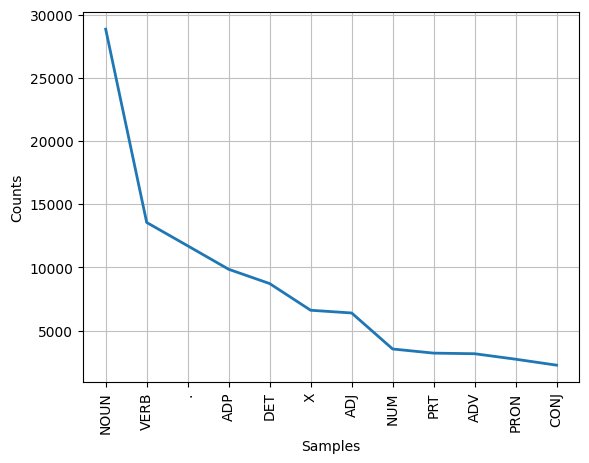

1.2 Mostrar cuál es la frecuencia (porcentaje) de aparición de cada una de las etiquetas en el corpus.

    .: 11.64%
  ADJ: 6.35%
  ADP: 9.79%
  ADV: 3.15%
 CONJ: 2.25%
  DET: 8.67%
 NOUN: 28.67%
  NUM: 3.52%
 PRON: 2.72%
  PRT: 3.20%
 VERB: 13.47%
    X: 6.57%
1.0


1.3 Mostrar las palabras con un grado de ambigüedad mayor que 3; es decir, las palabras que aparecen con más de tres etiquetas asociadas.

   Palabra 	 Etiquetas
         a 	 ['DET', 'NOUN', 'ADJ', 'ADP', 'X']
       and 	 ['CONJ', 'ADJ', 'ADP', 'NOUN']
      back 	 ['ADV', 'NOUN', 'VERB', 'PRT', 'ADJ']
     close 	 ['VERB', 'ADJ', 'NOUN', 'ADV']
      down 	 ['PRT', 'ADV', 'NOUN', 'ADP']
     first 	 ['NOUN', 'ADJ', 'ADV', 'NUM']
      free 	 ['ADJ', 'ADV', 'NOUN', 'VERB']
        in 	 ['ADP', 'PRT', 'ADV', 'NOUN']
      last 	 ['ADJ', 'VERB', 'ADV', 'NOUN']
       off 	 ['PRT', 'ADP', 'ADJ', 'ADV']
        on 	 ['ADP', 'PRT', 'NOUN', 'ADV']
      over 	 ['ADP', 'PRT', 'ADV', 'ADJ']
       the 	 ['DET', 'NOUN', 'ADJ', 'NUM']
Total de palabras con ambigüedad > 3:  13


# Ejercicio 2 - TrigramTagger

2.1 Entrena y evalúa un etiquetador basado en trigramas (TrigramTagger) sobre el corpus Penn Treebank utilizando el tagset='universal'. Corpus treebank 90% train - 10% test.

In [ ]:
from nltk.tag import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger
from nltk.corpus import treebank

Tasa de acierto del modelo de Trigramas sin suavizar: 9.1%


2.2 Suaviza el modelo de trigramas con un modelo  Backoff que encadene los etiquetadores de bigramas, unigramas y por defecto.

Tasa de acierto del modelo de Trigramas con backoff: 94.02%


2.3 Utiliza un modelo de afijos (AffixTagger) para mejorar los resultados. Prueba distintos tamaños de prefijos y sufijos, y escoge el mejor

In [ ]:
from nltk.tag import AffixTagger

Tasa de acierto de AffixTagger:  -4 -- 25.85 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 92.1%
Tasa de acierto de AffixTagger:  -3 -- 32.94 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 93.47%
Tasa de acierto de AffixTagger:  -2 -- 39.15 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.32%
Tasa de acierto de AffixTagger:  -1 -- 42.02 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.55%
Tasa de acierto de AffixTagger:  0 -- 73.62 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 88.6%
Tasa de acierto de AffixTagger:  1 -- 43.57 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.35%
Tasa de acierto de AffixTagger:  2 -- 36.44 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.24%
Tasa de acierto de AffixTagger:  3 -- 30.35 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 92.73%


Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.55%


2.4 Repite el experimento utilizando el conjunto de etiquetas original de treebank y compara los resultados.

Etiquetas originales. Tasa de acierto de Bigramas - backoff: 89.06%
Etiquetas originales. Tasa de acierto de Trigramas - backoff: 88.99%
Etiquetas originales. Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 91.11%


# Ejercicio 3: efectos del tamaño del corpus de entranamiento

Los etiquetadores basados en sistemas de aprendizaje necesitan de un conjunto de datos de entrenamiento mínimo para aprender modelos que ofrezcan un desempeño aceptable. En esta tarea se trata de mostrar la evolución de la precisión de un etiquetador conforme aumenta el tamaño del corpus de entrenamiento.
Para ello tenga en cuenta las siguientes consideraciones:
- El corpus se dividirá en dos particiones: 90% para training y 10% para test (las mismas particiones utilizadas en ejercicios anteriores).
- La partición de training se dividirá a su vez en 10 partes iguales.
- Deberá realizar 10 iteraciones empezando con la partición de training 1, y sumando en cada una de ellas una partición al corpus de entrenamiento.
- En cada iteración se entrenará y evaluará el etiquetador obteniendo la correspondiente precisión.
- Finalmente se representará gráficamente la evolución de la precisión en cada iteración.



3.1 Realice el experimento para el corpus treebank con el conjunto de etiquetas universal, utilizando el modelo de bigramas y de trigramas suavizados con backoff y Default Tagger.

Partición 1: Bigramas - backoff: 87.61%
Partición 1: Trigramas - backoff: 87.54%
Partición 2: Bigramas - backoff: 89.82%
Partición 2: Trigramas - backoff: 89.8%
Partición 3: Bigramas - backoff: 90.62%
Partición 3: Trigramas - backoff: 90.62%
Partición 4: Bigramas - backoff: 91.58%
Partición 4: Trigramas - backoff: 91.59%
Partición 5: Bigramas - backoff: 92.08%
Partición 5: Trigramas - backoff: 92.1%
Partición 6: Bigramas - backoff: 92.59%
Partición 6: Trigramas - backoff: 92.6%
Partición 7: Bigramas - backoff: 93.23%
Partición 7: Trigramas - backoff: 93.18%
Partición 8: Bigramas - backoff: 93.32%
Partición 8: Trigramas - backoff: 93.31%
Partición 9: Bigramas - backoff: 93.61%
Partición 9: Trigramas - backoff: 93.62%
Partición 10: Bigramas - backoff: 93.97%
Partición 10: Trigramas - backoff: 94.02%


3.2 Realice el mismo experimento con el juego de etiquetas original del corpus.

Partición 1: Etiquetas originales. Bigramas - backoff: 76.68%
Partición 1: Etiquetas originales. Trigramas - backoff: 76.65%
Partición 2: Etiquetas originales. Bigramas - backoff: 80.25%
Partición 2: Etiquetas originales. Trigramas - backoff: 80.15%
Partición 3: Etiquetas originales. Bigramas - backoff: 82.27%
Partición 3: Etiquetas originales. Trigramas - backoff: 82.24%
Partición 4: Etiquetas originales. Bigramas - backoff: 84.24%
Partición 4: Etiquetas originales. Trigramas - backoff: 84.19%
Partición 5: Etiquetas originales. Bigramas - backoff: 85.18%
Partición 5: Etiquetas originales. Trigramas - backoff: 85.08%
Partición 6: Etiquetas originales. Bigramas - backoff: 86.26%
Partición 6: Etiquetas originales. Trigramas - backoff: 86.14%
Partición 7: Etiquetas originales. Bigramas - backoff: 87.08%
Partición 7: Etiquetas originales. Trigramas - backoff: 86.97%
Partición 8: Etiquetas originales. Bigramas - backoff: 87.53%
Partición 8: Etiquetas originales. Trigramas - backoff: 87.41%


3.3 Represente gráficamente el resultado en una gráfica donde el eje x representa el número de oraciones de entrenamiento (talla) y el eje y la precisión del etiquetador.

Para realizar una gráfica puede utilizar pyplot. En la red encontrará tutoriales de uso de la librería. Este es un ejemplo básico de uso:




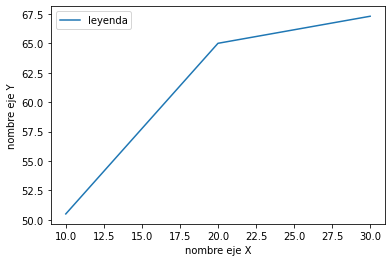

In [ ]:
import matplotlib.pyplot as plt

valores_x=[10,20,30]
valores_y=[50.5, 65.0, 67.3]
plt.ylabel("nombre eje Y")
plt.xlabel("nombre eje X")
plt.plot(valores_x, valores_y, label="leyenda")
plt.legend()
plt.show()

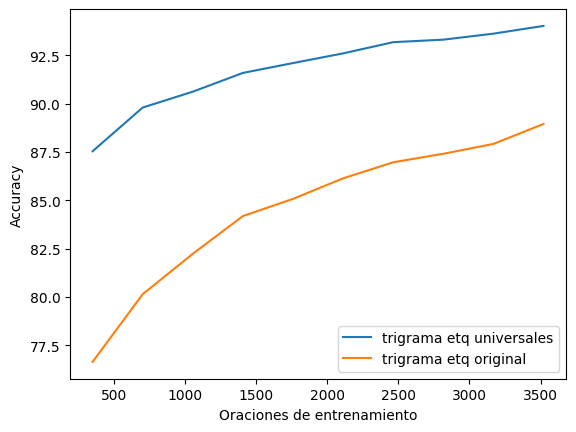